In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch

# 데이터 전처리 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)), # 이미지 크기 조정
    transforms.ToTensor(), # 이미지를 텐서로 변환
])

# ImageFolder를 사용해 전체 데이터셋 로드
data_dir = '/content/drive/MyDrive/nobreak/nobreak'  # 데이터셋 경로
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# 데이터셋 크기 계산 및 분할
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size

# random_split으로 데이터셋 분할
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# 훈련 및 검증 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 데이터 로더를 이용한 데이터 접근 예시
for images, labels in train_loader:
    # 훈련 데이터셋을 사용한 학습 코드
    pass

for images, labels in test_loader:
    pass

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader

model = models.mobilenet_v2(pretrained=True)

# 모델의 마지막 계층을 현재 데이터셋의 클래스 수에 맞게 조정
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 6) # 6개의 클래스로 수정

# DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 189MB/s]


In [ ]:
# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


# 단순화된 훈련 루프 예제
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # 훈련 모드로 설정
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')

    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy after epoch {epoch + 1}: {100 * correct / total}%")

KeyboardInterrupt: 

Confusion Matrix:
[[82 10  3  0  1 11]
 [ 1 91  1  1  2 14]
 [ 5  2  3  0  1  5]
 [ 0  2  1 75  1  1]
 [ 4  3  1  0 28  5]
 [ 2  6  1  0  0 79]]
Precision per class: [0.87234043 0.79824561 0.3        0.98684211 0.84848485 0.68695652]
Recall per class: [0.76635514 0.82727273 0.1875     0.9375     0.68292683 0.89772727]
F1-score: 0.7259683283711847
Maximum Precision: 0.9868421052631579
Maximum Recall: 0.9375


<ipython-input-9-59bde53359a2>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(range(6)))
<ipython-input-9-59bde53359a2>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(range(6)))


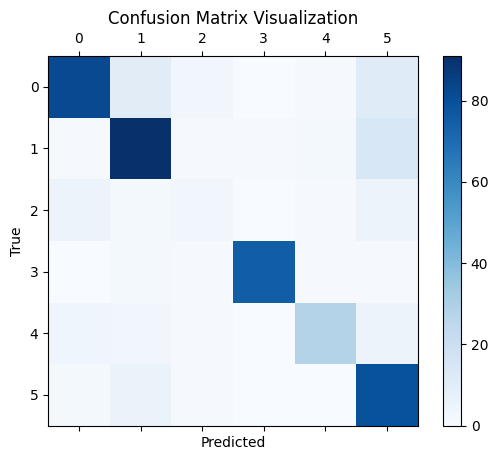

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# 모든 에폭이 끝난 후 테스트 데이터에 대해 실행
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Confusion matrix 계산
conf_matrix = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# F1-score 계산, average='macro'는 클래스 불균형을 고려하지 않음
precision = precision_score(all_labels, all_predictions, average=None)
recall = recall_score(all_labels, all_predictions, average=None)
f1 = f1_score(all_labels, all_predictions, average='macro')
print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"F1-score: {f1}")
max_precision = max(precision)
max_recall = max(recall)
print(f"Maximum Precision: {max_precision}")
print(f"Maximum Recall: {max_recall}")

# Confusion matrix 시각화
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticklabels([''] + list(range(6)))
ax.set_yticklabels([''] + list(range(6)))
plt.title('Confusion Matrix Visualization')
plt.show()


In [ ]:
# 모델 저장
torch.save(model.state_dict(), 'model_best_googlenet.pth')